In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
# Data Preparation
x_train, x_val_tes, y_train, y_val_tes = train_test_split(x, y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val_tes, y_val_tes, test_size=0.5)
# Training
X_train = torch.Tensor(x_train.values)
X_train_cnn = X_train.reshape(X_train.shape[0], 1, 1, X_train.shape[1])
Y_train = torch.Tensor(y_train.values)
Y_train_cnn = Y_train.reshape(Y_train.shape[0], 1)
# Validation
X_val = torch.Tensor(x_val.values)
X_val_cnn = X_val.reshape(X_val.shape[0], 1, 1, X_val.shape[1])
Y_val = torch.Tensor(y_val.values)
Y_val_cnn = Y_val.reshape(Y_val.shape[0], 1)
# Testing
X_test = torch.Tensor(x_test.values)
X_test_cnn = X_test.reshape(X_test.shape[0], 1, 1, X_test.shape[1])
Y_test = torch.Tensor(y_test.values)
Y_test_cnn = Y_test.reshape(Y_test.shape[0], 1)
# Training Loader
train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=10, shuffle=True)
train_loader_cnn = DataLoader(TensorDataset(X_train, Y_train), batch_size=1, shuffle=True)

In [165]:
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, 2)
        self.activation1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(16, 32, 2)
        self.activation2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(2)
        self.conv3 = nn.Conv1d(32, 64, 2)
        self.activation3 = nn.ReLU()
        self.linear1 = nn.Linear(64*14, 120)
        self.activation4 = nn.ReLU()
        self.linear2 = nn.Linear(120, 84)
        self.activation5 = nn.ReLU()
        self.linear3 = nn.Linear(84, 1)
        self.sigmoid = nn.Sigmoid()
        
    
    def forward(self, x):
        output = self.conv1(x)
        output = self.activation1(output)
        output = self.pool1(output)
        output = self.conv2(output)
        output = self.activation2(output)
        output = self.pool2(output)
        output = self.conv3(output)
        output = self.activation3(output)
        
        output = output.view(-1, 64*14)
        output = self.linear1(output)
        output = self.activation4(output)
        output = self.linear2(output)
        output = self.activation5(output)
        output = self.linear3(output)
        output = self.sigmoid(output)
        
        return output
    
network = MyCNN()
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(), lr=0.001)

In [166]:
epochs = 1000
final_loss = []
for epoch in range(epochs):
    running_loss = 0.

    for data in train_loader_cnn:
        inputs, outputs = data
        optimizer.zero_grad()

        predictions = network(inputs)
        loss = loss_function(predictions, outputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    final_loss.append(running_loss/len(train_loader))
    print('Epoch %3d: loss %.5f' % (epoch+1, running_loss/len(train_loader)))

RuntimeError: Calculated padded input size per channel: (1). Kernel size: (2). Kernel size can't be greater than actual input size

In [4]:
class MyModel(nn.Module):
    def __init__(self, input_features, dim1, dim2, output_features):
        super(MyModel, self).__init__()
#         self.conv1 = nn.Conv2d(2, 6, 5, padding=2)
#         self.activation0 = nn.ReLU()
        self.linear1 = nn.Linear(input_features, dim1, bias=False)
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(dim1, dim2)
        self.activation2 = nn.ReLU()
        self.linear3 = nn.Linear(dim2, output_features)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
#         output = self.conv1(x)
#         output = self.activation0(output)
        output = self.linear1(x)
        output = self.activation1(output)
        output = self.linear2(output)
        output = self.activation2(output)
        output = self.linear3(output)
        output = self.sigmoid(output)
        return output
    
network = MyModel(8, 5, 3, 1)

In [5]:
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(), lr=0.001)

In [6]:
epochs = 1000
final_loss = []
for epoch in range(epochs):
    running_loss = 0.

    for data in train_loader:
        inputs, outputs = data
        optimizer.zero_grad()

        predictions = network(inputs)
        loss = loss_function(predictions, outputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    final_loss.append(running_loss/len(train_loader))
    # print('Epoch %3d: loss %.5f' % (epoch+1, running_loss/len(train_loader)))

Text(0, 0.5, 'Epochs')

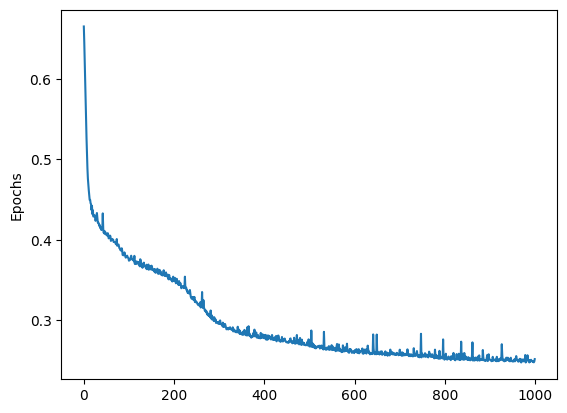

In [7]:
#plot the loss function
plt.plot(range(epochs),final_loss)
plt.ylabel('Loss')
plt.ylabel('Epochs')

In [8]:
running_loss

15.595681369304657

In [9]:
predictions = network.forward(X_test)
predictions = (predictions >= 0.5)
accuracy_score(Y_test, predictions.detach().numpy())

0.8311688311688312

In [15]:
predictions = network(X_test)
predictions = [1 if i >= 0.5 else 0 for i in predictions.detach().numpy()]
accuracy_score(Y_test, predictions)

0.8311688311688312

In [24]:
if Y_test[0] == 0:
    print('tes')

tes


In [21]:
for i in range(len(predictions)):
    print(Y_test[i]==predictions[i])

tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([False])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([False])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([False])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([False])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([False])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([False])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([False])
tensor([True])
tensor([True])
tensor([False])
tensor([False])
tensor([False])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])
tensor([True])


In [94]:
predictions = network.forward(X_val)
predictions = (predictions >= 0.5)
accuracy_score(Y_val, predictions.detach().numpy())

0.8311688311688312

In [81]:
fpr, tpr, threshold = roc_curve(Y_test, predictions)
roc_auc = auc(fpr, tpr)

AUC for our classifier is: 0.7971342383107088


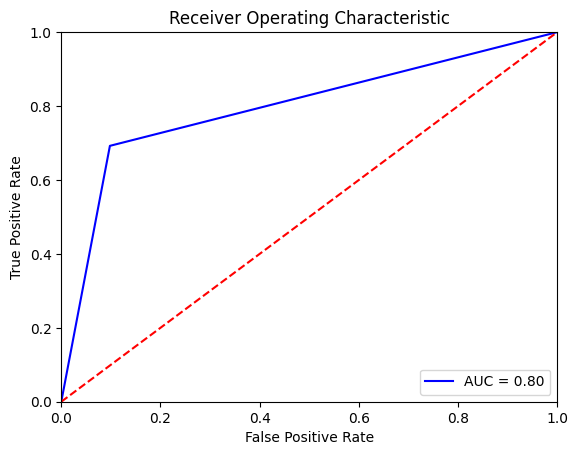

In [82]:
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [2]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split

# Download dataset from github
def download_file(url):
    local_filename = url.split('/')[-1]
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                f.write(chunk)
    return local_filename

file_url = 'https://raw.githubusercontent.com/xinxiewu/datasets/main/pima_indians_diabetes.csv'
df = pd.read_csv(download_file(file_url))

# Diabetes Group
df.loc[(df['diabetes'] == 1) & (df['glucose'] == 0), 'glucose'] = 140
df.loc[(df['diabetes'] == 1) & (df['bp'] == 0), 'bp'] = 74
df.loc[(df['diabetes'] == 1) & (df['skin_thick'] == 0), 'skin_thick'] = 27
df.loc[(df['diabetes'] == 1) & (df['insulin'] == 0), 'insulin'] = 100
df.loc[(df['diabetes'] == 1) & (df['bmi'] == 0), 'bmi'] = 34.25
df.loc[(df['diabetes'] == 1) & (df['pedigree'] == 0), 'pedigree'] = 0.449
# Non-Diabetes Group
df.loc[(df['diabetes'] == 0) & (df['glucose'] == 0), 'glucose'] = 107
df.loc[(df['diabetes'] == 0) & (df['bp'] == 0), 'bp'] = 70
df.loc[(df['diabetes'] == 0) & (df['skin_thick'] == 0), 'skin_thick'] = 21
df.loc[(df['diabetes'] == 0) & (df['insulin'] == 0), 'insulin'] = 68.792
df.loc[(df['diabetes'] == 0) & (df['bmi'] == 0), 'bmi'] = 30.05
df.loc[(df['diabetes'] == 0) & (df['pedigree'] == 0), 'pedigree'] = 0.336

# Normalization
df.preg = (df.preg - df.preg.mean())/df.preg.std()
df.glucose = (df.glucose - df.glucose.mean())/df.glucose.std()
df.bp = (df.bp - df.bp.mean())/df.bp.std()
df.skin_thick = (df.skin_thick - df.skin_thick.mean())/df.skin_thick.std()
df.insulin = (df.insulin - df.insulin.mean())/df.insulin.std()
df.bmi = (df.bmi - df.bmi.mean())/df.bmi.std()
df.pedigree = (df.pedigree - df.pedigree.mean())/df.pedigree.std()
df.age = (df.age - df.age.mean())/df.age.std()

# 7:3 Data Split
x = df.iloc[:, 0:8]
y = df.iloc[:, 8:9]